Convert mp4 to mp3: DON'T HAVE TO RUN EVERY TIME

In [36]:
import moviepy

In [37]:
from moviepy.editor import *

In [38]:
import os
os.getcwd()

'/endosome/work/bioinformatics/s229618'

In [7]:
video = VideoFileClip("Test Video 1.3gp.mp4")

In [8]:
video.audio.write_audiofile("Test Audio 1.mp3")

chunk:   1%|          | 159/21732 [00:00<00:13, 1585.85it/s, now=None]

MoviePy - Writing audio in Test Audio 1.mp3


MoviePy - Done.


Trying some test audio analysis using librosa

In [10]:
#pip install librosa

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 253 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 55.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 76.5 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 1.0 MB/s  eta 0:00:01
     |████████████████████████████████| 1.3 MB 82.8 MB/s eta 0:00:01
     |████████████████████████████████| 16.9 MB 76.1 MB/s eta 0:00:01    |███████████████▋                | 8.2 MB 76.1 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


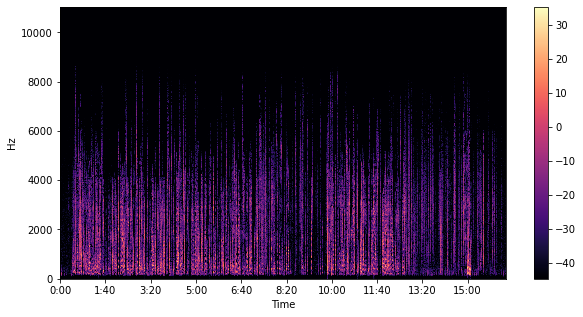

In [1]:
# https://www.topcoder.com/thrive/articles/audio-data-analysis-using-python
import librosa
import matplotlib.pyplot as plt
audio = 'Test Audio 1.mp3'
x, sr = librosa.load(audio)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize = (10, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

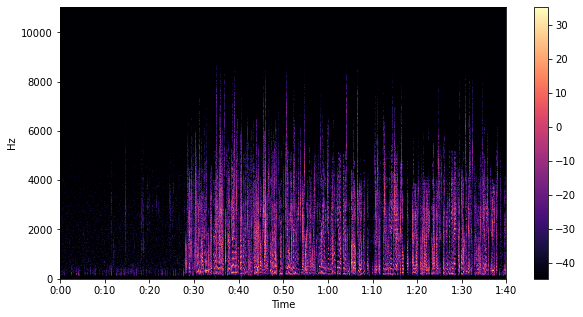

In [10]:
# https://www.topcoder.com/thrive/articles/audio-data-analysis-using-python
plt.figure(figsize = (10, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.xlim(0, 100)
plt.colorbar()

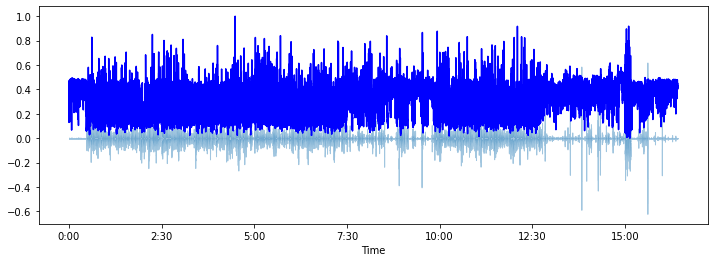

In [11]:
import sklearn
from sklearn import preprocessing
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr = sr)[0]
#spectral_centroids.shape(775, )

# Computing the time variable for visualization

plt.figure(figsize = (12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation

def normalize(x, axis = 0):
  return preprocessing.minmax_scale(x, axis = axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr = sr, alpha = 0.4)
plt.plot(t, normalize(spectral_centroids), color = 'b')

(-0.4, 0.6)

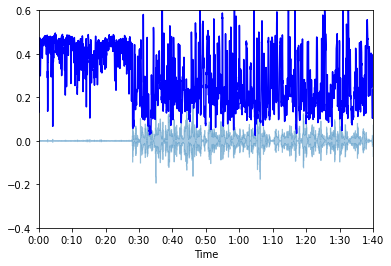

In [14]:
librosa.display.waveshow(x, sr = sr, alpha = 0.4)
plt.plot(t, normalize(spectral_centroids), color = 'b')
plt.xlim(0, 100)
plt.ylim(-0.4, 0.6)

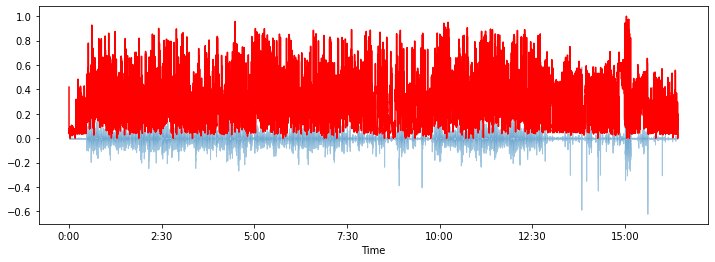

In [28]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x + 0.01, sr = sr)[0]
plt.figure(figsize = (12, 4))
librosa.display.waveshow(x, sr = sr, alpha = 0.4)
plt.plot(t, normalize(spectral_rolloff), color = 'r')

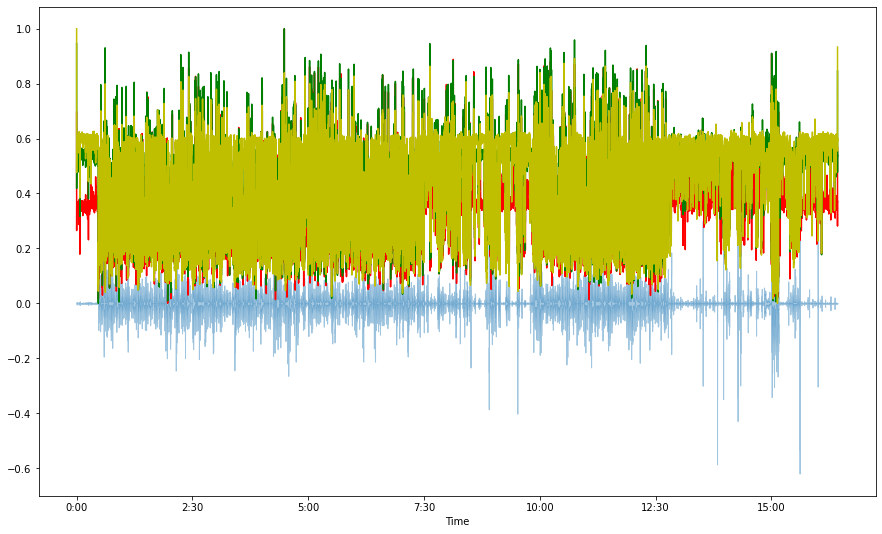

In [29]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x + 0.01, sr = sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x + 0.01, sr = sr, p = 3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x + 0.01, sr = sr, p = 4)[0]
plt.figure(figsize = (15, 9))
librosa.display.waveshow(x, sr = sr, alpha = 0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color = 'r')
plt.plot(t, normalize(spectral_bandwidth_3), color = 'g')
plt.plot(t, normalize(spectral_bandwidth_4), color = 'y')

Trying some signal processing stuff

Trying Fundamental Frequency

In [6]:
f0, voiced_flag, voiced_probs = librosa.pyin(y=x, sr=sr, fmin=65, fmax=2093)

In [7]:
times = librosa.times_like(f0)

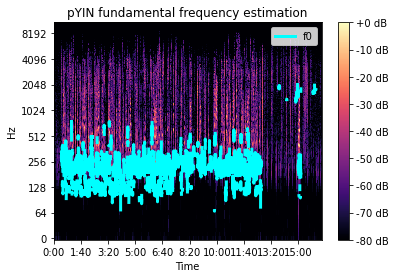

In [9]:
# overlay over a spectrogram
import numpy as np
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

(0.0, 100.0)

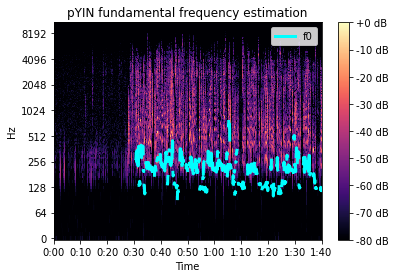

In [25]:
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')
plt.xlim(0, 100)

In [30]:
np.nanmean(f0)

238.6535699089675

Try stuff on second video (DON'T NEED TO RUN THIS AGAIN)

In [39]:
video2 = VideoFileClip("Test Video 2.3gp.mp4")

In [40]:
video2.audio.write_audiofile("Test Audio 2.mp3")

chunk:   0%|          | 64/21320 [00:00<00:34, 619.64it/s, now=None]

MoviePy - Writing audio in Test Audio 2.mp3


MoviePy - Done.


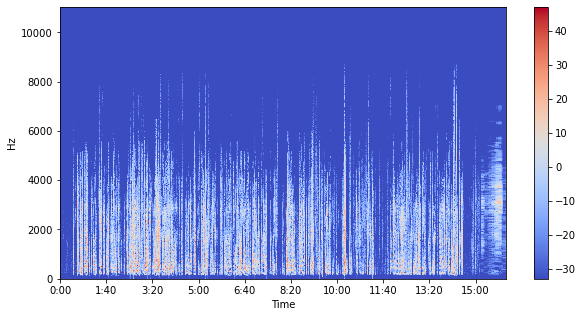

In [47]:
audio2 = 'Test Audio 2.mp3'
x2, sr2 = librosa.load(audio2)
X2 = librosa.stft(x2)
Xdb2 = librosa.amplitude_to_db(abs(X2))
plt.figure(figsize = (10, 5))
librosa.display.specshow(Xdb2, sr = sr2, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

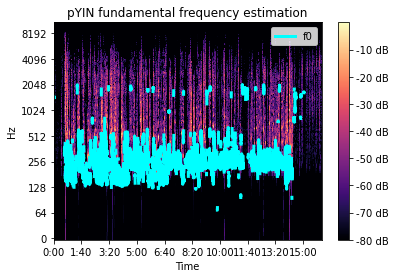

In [48]:
f02, voiced_flag2, voiced_probs2 = librosa.pyin(y=x2, sr=sr2, fmin=65, fmax=2093)
times2 = librosa.times_like(f02)
D2 = librosa.amplitude_to_db(np.abs(librosa.stft(x2)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D2, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times2, f02, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [49]:
np.nanmean(f02)

273.7535481427363